# Social Media Sentiment Analysis 

##### by `Sahil Rozera`

![sen](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/performing-twitter-sentiment-analysis1.jpg)

# Problem Statement
#### Dataset containing several tweets with positive and negative sentiment associated with it
- Cyber bullying and hate speech has been a menace for quite a long time,So our objective for this task is to detect speeches tweets associated with negative sentiments.From this dataset we classify a tweet as hate speech if it has racist or sexist tweets associated with it.

- So our task here is to classify racist and sexist tweets from other tweets and filter them out.

![tweet](http://www.fuelaccounting.ca/wp-content/uploads/2015/04/twitter_logo-580-90.jpg)

# Dataset Description

- The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text.Each line of the file is a data record. Each record consists of one or more fields, separated by commas. 
- Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is negative and label ‘0’ denotes the tweet is not positive,our objective is to predict the labels on the given test dataset.

# Attribute Information

- id : The id associated with the tweets in the given dataset
- tweets : The tweets collected from various sources and having either postive or negative sentiments associated with it
- label : A tweet with label '0' is of positive sentiment while a tweet with label '1' is of negative sentiment

## Importing the necessary packages 

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Train dataset used for our analysis

In [2]:
train = pd.read_csv('train_2kmZucJ.csv')

#### We make a copy of training data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [3]:
train_original=train.copy()

#### Here we see that there are a total of 7920 tweets in the training dataset

In [4]:
train.shape

(7920, 3)

In [5]:
train_original

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


## Test dataset used for our analysis

In [6]:
test = pd.read_csv('test_oJQbWVk.csv')

#### We make a copy of test data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [7]:
test_original=test.copy()

#### Here we see that there are a total of 1953 tweets in the test dataset

In [8]:
test.shape

(1953, 2)

In [9]:
test_original

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,Now Available - Hoodie. Check it out here - ht...
1950,9871,There goes a crack right across the screen. If...
1951,9872,@codeofinterest as i said #Adobe big time we m...


### We combine Train and Test datasets for pre-processing stage

In [10]:
combine = train.append(test,ignore_index=True,sort=True)

In [11]:
combine.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [12]:
combine.tail()

,id,label,tweet
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...
9870,9871,NaN,There goes a crack right across the screen. If...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...
9872,9873,NaN,Finally I got it .. thanx my father .. #Samsun...


# Data Pre-Processing

![pre](https://www.electronicsmedia.info/wp-content/uploads/2017/12/Data-Preprocessing.jpg)

##  Removing Twitter Handles (@user)

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.


In [13]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

Here NumPy Vectorization `np.vectorize()` is used because it is much more faster than the conventional for loops when working on datasets of medium to large sizes.

In [14]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


## Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [15]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [16]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...
5,6,1.0,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...,Happy for us #instapic #instadaily #us #son...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK http www ebay c...
8,9,0.0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera...


## Removing Short Words


We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [17]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...
5,6,1.0,iPhone software update fucked up my phone big ...,iPhone software update fucked phone time Stupi...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...,Happy #instapic #instadaily #sony #xperia #xpe...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...,Type charger cable http ebay #bay #Amazon #ets...
8,9,0.0,Bout to go shopping again listening to music #...,Bout shopping again listening music #iphone #j...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera ...


 ## Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [18]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: Tidy_Tweets, dtype: object

## Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [19]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: Tidy_Tweets, dtype: object

#### Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test http mfqv #android...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1.0,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


# Visualization from Tweets


![vis](https://previews.123rf.com/images/mindscanner/mindscanner1404/mindscanner140401428/27857012-word-cloud-with-nlp-related-tags.jpg)

## WordCloud

![wc](https://az158878.vo.msecnd.net/marketing/product/42949674199/f89c7e08-56ac-457d-ae87-b6165e51432f/screen2.jpg)

### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

#### Importing Packages necessary for generating a WordCloud

In [21]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

 #### Store all the words from the dataset which are non-racist/sexist

In [22]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])
all_words_positive

'#fingerprint #pregnanc test http mfqv #android #app #beauti #cute #health #iger #iphoneonli #iphonesia #iphon final transpar silicon case thank uncl #yay #soni #xperia #sonyexperia http instagram yget love thi would #talk #makememori #unplug #relax #iphon #smartphon #wifi #connect http lsupcu wire know georg made that #iphon #cute #daventri #home http instagr happi #instap #instadaili #soni #xperia #xperiaz http instagram qgfwlvj type charger cabl http ebay #bay #amazon #etsi year #rob cross #tobi young #evemun #mcmafia #taylor #spectr #newyear #start #recip #technolog #samsunggalaxi #iphonex twitter pjiwq bout shop again listen music #iphon #justm #music #likeforlik #followforfollow http instagr tlql photo #fun #selfi #pool #water #soni #camera #picoftheday #sun #instagood #boy #cute #outdoor http tmblr zajc just made anoth crazi purchas theori work hard play hard #ipad #appl #shop http instagr nuyfhvy from #deepellum toward #downtown #dalla #bigd #saturday #soni #summer #urban http 

#### We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets. 

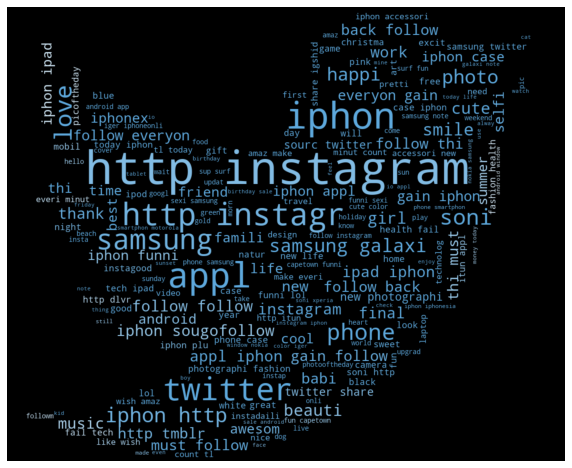

In [23]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#### Store all the words from the dataset which are racist/sexist

In [24]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])
all_words_negative

'what amaz servic appl even talk about question have unless them their stupid support iphon softwar updat fuck phone time stupid iphon #appl when make ipod dont make color inch thinner make crash everi five fuckin minit heavi machineri doe what need realli drop ball with that design #drinkyourhaterad contempl give iphon bandwagon simpli becaus #cellcom android #depress #idontwantto batteri pain charg overnight lunchtim batteri dead #hateorang reason have #iphon #suck #appl #truth #truthbetold #agre #fact #realitycheck #blackberryp twitter zpggd cazn appl store gunna screen monday fuck appl store #fuckingpiss thi ipod four day thi button back broke accident onc when your iphon screen goe complet black keep get text fuck check them #appl thiphon ipod mess haven done noth #myloss #appl ipod touch frozen appl logo when start lose demi music pic will kill someon #soangri #hateappl delet individu song from phone #appl #itun everybodi freak about here like duuud even window phone more advanc 

#### As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on.

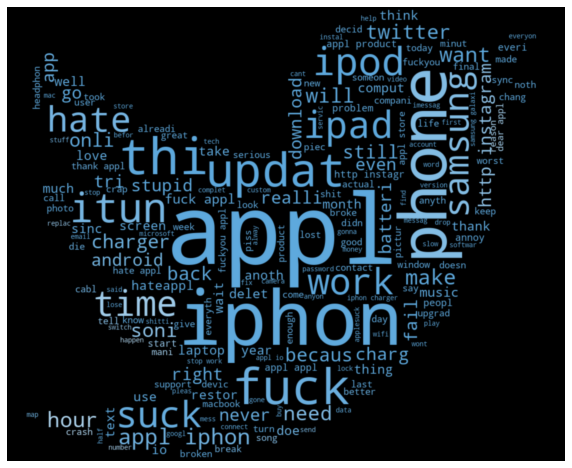

In [25]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

![hash](https://www.socialtalent.com/wp-content/uploads/2015/07/Twitter-Logo-Hashtag.png)

### Function to extract hashtags from tweets

In [26]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

#### A nested list of all the hashtags from the positive reviews from the dataset

In [27]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])
ht_positive

[['fingerprint',
  'pregnanc',
  'android',
  'app',
  'beauti',
  'cute',
  'health',
  'iger',
  'iphoneonli',
  'iphonesia',
  'iphon'],
 ['yay', 'soni', 'xperia', 'sonyexperia'],
 ['talk',
  'makememori',
  'unplug',
  'relax',
  'iphon',
  'smartphon',
  'wifi',
  'connect'],
 ['iphon', 'cute', 'daventri', 'home'],
 ['instap', 'instadaili', 'soni', 'xperia', 'xperiaz'],
 ['bay',
  'amazon',
  'etsi',
  'rob',
  'tobi',
  'evemun',
  'mcmafia',
  'taylor',
  'spectr',
  'newyear',
  'start',
  'recip',
  'technolog',
  'samsunggalaxi',
  'iphonex'],
 ['iphon', 'justm', 'music', 'likeforlik', 'followforfollow'],
 ['fun',
  'selfi',
  'pool',
  'water',
  'soni',
  'camera',
  'picoftheday',
  'sun',
  'instagood',
  'boy',
  'cute',
  'outdoor'],
 ['ipad', 'appl', 'shop'],
 ['deepellum',
  'downtown',
  'dalla',
  'bigd',
  'saturday',
  'soni',
  'summer',
  'urban'],
 ['iphon'],
 ['iphonesia', 'iphon', 'instagood', 'instagram', 'photooftheday', 'tweegram'],
 ['appl', 'art', 'easte

#### Here we unnest the list 

In [28]:
ht_positive_unnest = sum(ht_positive,[])
ht_positive_unnest

['fingerprint',
 'pregnanc',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'yay',
 'soni',
 'xperia',
 'sonyexperia',
 'talk',
 'makememori',
 'unplug',
 'relax',
 'iphon',
 'smartphon',
 'wifi',
 'connect',
 'iphon',
 'cute',
 'daventri',
 'home',
 'instap',
 'instadaili',
 'soni',
 'xperia',
 'xperiaz',
 'bay',
 'amazon',
 'etsi',
 'rob',
 'tobi',
 'evemun',
 'mcmafia',
 'taylor',
 'spectr',
 'newyear',
 'start',
 'recip',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'iphon',
 'justm',
 'music',
 'likeforlik',
 'followforfollow',
 'fun',
 'selfi',
 'pool',
 'water',
 'soni',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'cute',
 'outdoor',
 'ipad',
 'appl',
 'shop',
 'deepellum',
 'downtown',
 'dalla',
 'bigd',
 'saturday',
 'soni',
 'summer',
 'urban',
 'iphon',
 'iphonesia',
 'iphon',
 'instagood',
 'instagram',
 'photooftheday',
 'tweegram',
 'appl',
 'art',
 'easter',
 'dear',
 'friend',
 'wife',
 'bake',
 'appl',


#### A nested list of all the hashtags from the negative reviews from the dataset

In [29]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])
ht_negative

[[],
 [],
 ['appl'],
 ['drinkyourhaterad'],
 ['cellcom', 'depress', 'idontwantto'],
 ['hateorang'],
 ['iphon',
  'suck',
  'appl',
  'truth',
  'truthbetold',
  'agre',
  'fact',
  'realitycheck',
  'blackberryp'],
 ['fuckingpiss'],
 [],
 ['appl'],
 ['myloss', 'appl'],
 ['soangri', 'hateappl'],
 ['appl', 'itun'],
 [],
 ['iphon', 'appl'],
 [],
 [],
 [],
 [],
 ['sorri'],
 ['appl'],
 ['tech'],
 ['win', 'getalif', 'appl', 'tecshit'],
 ['fuckyou', 'appl', 'anotherangrycustom'],
 [],
 ['appl',
  'hater',
  'yousuck',
  'briantong',
  'easytotalk',
  'producesometh',
  'korean',
  'loser'],
 ['soni'],
 ['appl', 'io'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['yosemit', 'appl', 'updat'],
 ['fuckyou', 'soni'],
 ['sodepress', 'samsunggalaxyftw', 'loljk'],
 ['appl', 'usefuckingtorr'],
 ['appl', 'iphon'],
 ['samsung'],
 ['appl'],
 [],
 ['getbetterbatteri'],
 ['geniusbar', 'appl', 'customercar', 'batteri'],
 ['shitbird', 'colbertreport', 'appl', 'iwatch'],
 ['appl', 'iphon'],
 [],
 ['iphon', 'appl'],
 [],
 

#### Here we unnest the list

In [30]:
ht_negative_unnest = sum(ht_negative,[])
ht_negative_unnest

['appl',
 'drinkyourhaterad',
 'cellcom',
 'depress',
 'idontwantto',
 'hateorang',
 'iphon',
 'suck',
 'appl',
 'truth',
 'truthbetold',
 'agre',
 'fact',
 'realitycheck',
 'blackberryp',
 'fuckingpiss',
 'appl',
 'myloss',
 'appl',
 'soangri',
 'hateappl',
 'appl',
 'itun',
 'iphon',
 'appl',
 'sorri',
 'appl',
 'tech',
 'win',
 'getalif',
 'appl',
 'tecshit',
 'fuckyou',
 'appl',
 'anotherangrycustom',
 'appl',
 'hater',
 'yousuck',
 'briantong',
 'easytotalk',
 'producesometh',
 'korean',
 'loser',
 'soni',
 'appl',
 'io',
 'yosemit',
 'appl',
 'updat',
 'fuckyou',
 'soni',
 'sodepress',
 'samsunggalaxyftw',
 'loljk',
 'appl',
 'usefuckingtorr',
 'appl',
 'iphon',
 'samsung',
 'appl',
 'getbetterbatteri',
 'geniusbar',
 'appl',
 'customercar',
 'batteri',
 'shitbird',
 'colbertreport',
 'appl',
 'iwatch',
 'appl',
 'iphon',
 'iphon',
 'appl',
 'appl',
 'suck',
 'updat',
 'disabl',
 'app',
 'custom',
 'android',
 'disappoint',
 'dissatisfi',
 'appl',
 'iphon',
 'incasearmband',
 'fu

## Plotting BarPlots

![plot](https://www.mathworks.com/help/examples/graphics/win64/SingleDataSeriesExample_01.png)

### For Positive Tweets in the dataset

#### Counting the frequency of the  hashtag words having Positive Sentiment 

In [31]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'iphon': 3208, 'appl': 1357, 'samsung': 1218, 'soni': 722, 'new': 498, 'ipad': 364, 'android': 335, 'life': 314, 'cute': 297, 'instagram': 291, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [32]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [33]:
df_positive.head(10)

,Hashtags,Count
0,fingerprint,4
1,pregnanc,1
2,android,335
3,app,198
4,beauti,286
5,cute,297
6,health,117
7,iger,148
8,iphoneonli,132
9,iphonesia,137


#### Plotting the barplot for the 10 most frequent words used for hashtags 

In [34]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

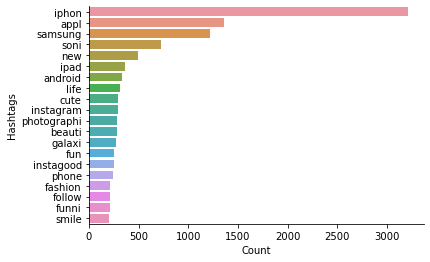

In [35]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

### For Negative Tweets in the dataset

#### Counting the frequency of the  hashtag words having Negative Sentiment 

In [36]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [37]:
word_freq_negative

FreqDist({'appl': 794, 'iphon': 242, 'samsung': 76, 'fuckyou': 66, 'soni': 65, 'io': 63, 'hateappl': 46, 'fail': 45, 'suck': 41, 'ipad': 35, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [38]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [39]:
df_negative.head(10)

,Hashtags,Count
0,appl,794
1,drinkyourhaterad,1
2,cellcom,1
3,depress,2
4,idontwantto,1
5,hateorang,2
6,iphon,242
7,suck,41
8,truth,2
9,truthbetold,1


#### Plotting the barplot for the 10 most frequent words used for hashtags 

In [40]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

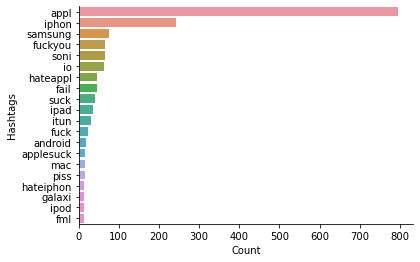

In [41]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets

### Bag-of-Words Features

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-



- D1: He is a lazy boy. She is also lazy.

- D2: Smith is a lazy person.

First, it creates a vocabulary using unique words from all the documents
#### [‘He’ , ’She’ , ’lazy’ , 'boy’ ,  'Smith’  , ’person’] 

- Here, D=2, N=6



- The matrix M of size 2 X 6 will be represented as:

![bow](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/table.png)

The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# max_df = 0.90 means "ignore terms that appear in more than 90% of the documents".
# min_df = 2 means "ignore terms that appear in less than 2 documents"

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9870,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Features 

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 
#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).


- IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 
#### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

#### Example:

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

![tfidf](https://skymind.ai/images/wiki/tfidf.png)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
9869,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28936,0.0
9870,0.0,0.0,0.0,0.0,0.0,0.0,0.329743,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
9871,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


# Applying Machine Learning Models

![ml](https://ak8.picdn.net/shutterstock/videos/23516428/thumb/12.jpg?i10c=img.resize(height:160))

### Using the features from Bag-of-Words Model for training set

In [44]:
train_bow = bow[:7920]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using features from TF-IDF for training set

In [45]:
train_tfidf_matrix = tfidf_matrix[:7920]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [46]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [47]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

#### Using TF-IDF features

In [48]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

### Using Bag-of-Words Features 

In [51]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[0.98111945, 0.01888055],
       [0.09327508, 0.90672492],
       [0.95529835, 0.04470165],
       ...,
       [0.99882666, 0.00117334],
       [0.45239724, 0.54760276],
       [0.99568094, 0.00431906]])

#### Calculating the F1 score

In [53]:
from sklearn.metrics import f1_score

In [54]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 1, 0, ..., 0, 1, 0])

In [55]:
# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.7919366450683945

### Using TF-IDF Features

In [56]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98070726, 0.01929274],
       [0.74898296, 0.25101704],
       [0.83134883, 0.16865117],
       ...,
       [0.98218955, 0.01781045],
       [0.98711658, 0.01288342],
       [0.97973468, 0.02026532]])

#### Calculating the F1 score

In [58]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.8008982035928143

## XGBoost

In [59]:
from xgboost import XGBClassifier

### Using Bag-of-Words Features 

In [60]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [61]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=22, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[0.9759984 , 0.02400162],
       [0.01348978, 0.9865102 ],
       [0.99189305, 0.00810694],
       ...,
       [0.9985368 , 0.00146317],
       [0.2551881 , 0.7448119 ],
       [0.9950388 , 0.0049612 ]], dtype=float32)

#### Calculating the F1 score

In [63]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.7862873814733772

### Using TF-IDF Features 

In [64]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [65]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=29, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9924315 , 0.00756845],
       [0.837048  , 0.16295199],
       [0.7264552 , 0.2735448 ],
       ...,
       [0.96231794, 0.03768206],
       [0.9973721 , 0.00262793],
       [0.8830849 , 0.1169151 ]], dtype=float32)

#### Calculating the F1 score

In [67]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.7808641975308641

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [70]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [71]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [72]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.6937151949085123

### Using TF-IDF Features

In [73]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [74]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [75]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.6816292601828761

# Model Comparison

In [76]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [77]:
score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,7)])

In [78]:
compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.791937,0.786287,0.693715,0.800898,0.780864,0.681629


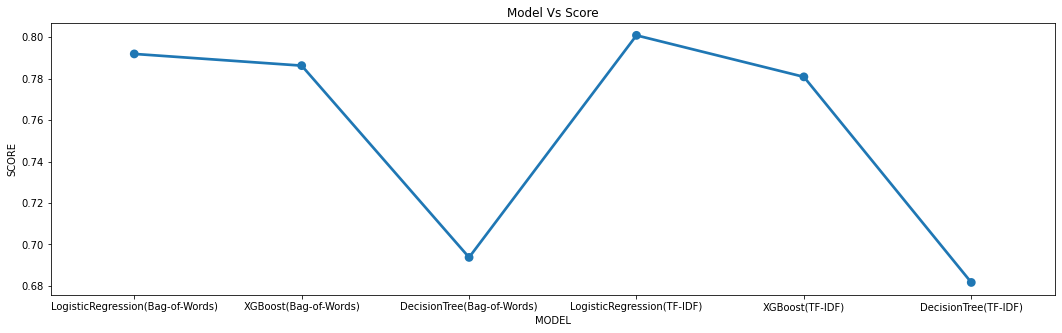

In [79]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

## Using the best possible model to predict for the test data

#### From the above comaprison graph we can see that Logistic Regression trained using TF-IDF features gives us the best performance

In [82]:
test_tfidf = tfidf_matrix[7920:]

In [83]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

### Test dataset after prediction

In [84]:
res = pd.read_csv('result.csv')

In [85]:
res

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,0
1949,9870,0
1950,9871,1
1951,9872,1


# Summary

- From the given dataset we were able to predict on which class i.e Positive or Negative does the given tweet fall into.The following data was collected from Analytics Vidhya's site.

### Pre-processing 
1. Removing Twitter Handles(@user)
2. Removing puntuation,numbers,special characters
3. Removing short words i.e. words with length<3
4. Tokenization
5. Stemming

### Data Visualisation
1. Wordclouds
2. Barplots

### Word Embeddings used to convert words to features for our Machine Learning Model

1. Bag-of-Words 
2. TF-IDF 

### Machine Learning Models used
1. Logistic Regression
2. XGBoost
3. Decision Trees 

### Evaluation Metrics 
- F1 score

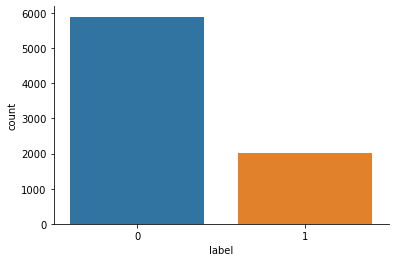

In [86]:
sns.countplot(train_original['label'])
sns.despine()

### Why use F1-Score instead of Accuracy ?

- From the above countplot generated above we see how imbalanced our dataset is.We can see that the values with label:0 i.e. positive sentiments are quite high in number as compared to the values with labels:1 i.e. negative sentiments.


- So when we keep accuracy as our evaluation metric there may be cases where we may encounter high number of false positives.

#### Precison & Recall :- 
- Precision means the percentage of your results which are relevant.
- Recall refers to the percentage of total relevant results correctly classified by your algorithm
![met](https://cdn-images-1.medium.com/max/800/1*pOtBHai4jFd-ujaNXPilRg.png)

- We always face a trade-off situation between Precison and Recall i.e. High Precison gives low recall and vice versa.




- In most problems, you could either give a higher priority to maximizing precision, or recall, depending upon the problem you are trying to solve. But in general, there is a simpler metric which takes into account both precision and recall, and therefore, you can aim to maximize this number to make your model better. This metric is known as F1-score, which is simply the harmonic mean of precision and recall.

![f1](https://cdn-images-1.medium.com/max/800/1*DIhRgfwTcxnXJuKr2_cRvA.png)


- So this metric seems much more easier and convenient to work with, as you only have to maximize one score, rather than balancing two separate scores.